# Import ```arff``` dataset

In [29]:
import pandas as pd
from scipy.io import arff

import plotly
plotly.tools.set_credentials_file(username='artemii-yanushevskyi', api_key='aRmQfG7U4SAlhISYVym7')

import plotly.plotly as py
import plotly.graph_objs as go


import numpy as np
import seaborn as sns

data, meta = arff.loadarff('cworkTrain.arff')
df = pd.DataFrame(data)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termDeposit
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'no'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'no'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'no'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'no'
4,35.0,b'management',b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'no'


# Convert attribute type to _categorical_

In [30]:
df_test = pd.DataFrame({"A": [1, 2, 2, 7]})
df_test["B"] = df_test["A"].astype('category')
display(df_test, df_test.describe(include='all'))

,A,B
0,1,1
1,2,2
2,2,2
3,7,7


,A,B
count,4.000000,4.0
unique,NaN,3.0
top,NaN,2.0
freq,NaN,2.0
mean,3.000000,NaN
std,2.708013,NaN
min,1.000000,NaN
25%,1.750000,NaN
50%,2.000000,NaN
75%,3.250000,NaN


In [31]:
# convert attribute values with type "object" to regular strings
objects_df = df.select_dtypes([object]) # select only atributes of object type
stack_df = objects_df.stack()
decoded_stack_df = stack_df.str.decode('utf-8')
decoded_objects_df = decoded_stack_df.unstack()

# replace in df
for col in decoded_objects_df.columns:
    df[col] = decoded_objects_df[col]

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termDeposit
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139.0,1.0,-1.0,0.0,unknown,no


Object types:
```
object
int64 (int)
float64
datetime64
bool
category
timedelta```

In [32]:
display(df.select_dtypes([object]).describe(), df.select_dtypes([float, int]).describe().round(1))

,job,marital,education,default,housing,loan,contact,month,poutcome,termDeposit
count,36169,36169,36169,36169,36169,36169,36169,36169,36169,36169
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7808,21746,18594,35512,20049,30363,23416,11013,29621,31981


,age,balance,day,duration,campaign,pdays,previous
count,36169.0,36169.0,36169.0,36169.0,36169.0,36169.0,36169.0
mean,40.9,1352.8,15.8,256.7,2.8,39.9,0.6
std,10.6,3028.9,8.3,255.6,3.1,99.8,2.4
min,18.0,-6847.0,1.0,0.0,1.0,-1.0,0.0
25%,33.0,70.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,445.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1417.0,21.0,317.0,3.0,-1.0,0.0
max,95.0,98417.0,31.0,4918.0,63.0,871.0,275.0


In [33]:
display(df[df.termDeposit == 'yes'].select_dtypes([object]).describe(), df[df.termDeposit == 'yes'].describe().round(1))

,job,marital,education,default,housing,loan,contact,month,poutcome,termDeposit
count,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188
unique,12,3,4,2,2,2,3,12,4,1
top,management,married,secondary,no,no,no,cellular,may,unknown,yes
freq,1025,2165,1960,4145,2648,3797,3466,729,2709,4188


,age,balance,day,duration,campaign,pdays,previous
count,4188.0,4188.0,4188.0,4188.0,4188.0,4188.0,4188.0
mean,41.5,1847.2,15.2,534.7,2.1,67.0,1.1
std,13.5,3717.8,8.5,388.4,1.9,117.2,2.5
min,18.0,-3058.0,1.0,8.0,1.0,-1.0,0.0
25%,31.0,203.8,8.0,246.0,1.0,-1.0,0.0
50%,38.0,730.5,15.0,426.0,2.0,-1.0,0.0
75%,50.0,2166.0,22.0,716.2,3.0,97.0,1.0
max,93.0,81204.0,31.0,3881.0,32.0,842.0,58.0


In [6]:
trace = go.Box(x=df[['balance']])
py.iplot([trace], filename='balance boxplot')

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Shall we take a closer look on what is going on with values above 40k

In [7]:
df[df.balance > 40000].sort_values('balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termDeposit
21672,59.0,retired,married,tertiary,no,41242.0,no,no,cellular,21.0,nov,161.0,1.0,-1.0,0.0,unknown,no
17077,43.0,management,married,tertiary,no,41630.0,no,no,cellular,18.0,aug,68.0,4.0,-1.0,0.0,unknown,no
15528,55.0,entrepreneur,married,tertiary,no,41923.0,no,no,cellular,6.0,aug,69.0,3.0,-1.0,0.0,unknown,no
15836,42.0,entrepreneur,married,tertiary,no,42045.0,no,no,cellular,8.0,aug,205.0,2.0,-1.0,0.0,unknown,no
18212,55.0,management,single,tertiary,no,43074.0,yes,no,cellular,25.0,aug,92.0,6.0,-1.0,0.0,unknown,no
23610,59.0,unemployed,divorced,secondary,no,44134.0,no,no,cellular,3.0,feb,117.0,1.0,-1.0,0.0,unknown,no
7540,59.0,housemaid,divorced,secondary,no,45141.0,no,no,unknown,6.0,jun,42.0,1.0,-1.0,0.0,unknown,no
357,39.0,technician,single,unknown,no,45248.0,yes,no,unknown,6.0,may,1623.0,1.0,-1.0,0.0,unknown,yes
7629,58.0,entrepreneur,married,primary,no,52499.0,no,no,unknown,6.0,jun,198.0,2.0,-1.0,0.0,unknown,no
17673,40.0,management,married,tertiary,no,52527.0,no,no,cellular,21.0,aug,140.0,11.0,-1.0,0.0,unknown,no


Notice that the majority are either married or divorced. So we might want to separate the dataset into two.

In [8]:
display(
    df['marital'].value_counts(),
    df.groupby('marital')['balance'].mean()
)

married     21746
single      10260
divorced     4163
Name: marital, dtype: int64

marital
divorced    1169.497718
married     1422.419709
single      1279.754971
Name: balance, dtype: float64

In [19]:
df['marital'].value_counts()['married']

21746

In [35]:
trace0 = go.Box(x=df[df.marital=='married'][['balance']].values, name='married {:,}'.format(df['marital'].value_counts()['married']))
trace1 = go.Box(x=df[df.marital=='divorced'][['balance']].values, name='divorced {:,}'.format(df['marital'].value_counts()['divorced']))
trace2 = go.Box(x=df[df.marital=='single'][['balance']].values, name='single {:,}'.format(df['marital'].value_counts()['single']))

data = [trace0, trace1, trace2]
py.iplot(data, filename='balance boxplot marital partition')

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [28]:
trace0 = go.Histogram(x=df[df.marital=='married'][['balance']].values, name='married {:,}'.format(df['marital'].value_counts()['married']))
trace1 = go.Histogram(x=df[df.marital=='divorced'][['balance']].values, name='divorced {:,}'.format(df['marital'].value_counts()['divorced']))
trace2 = go.Histogram(x=df[df.marital=='single'][['balance']].values, name='single {:,}'.format(df['marital'].value_counts()['single']))

data = [trace0, trace1, trace2]
py.iplot(data, filename='balance histogram marital partition')

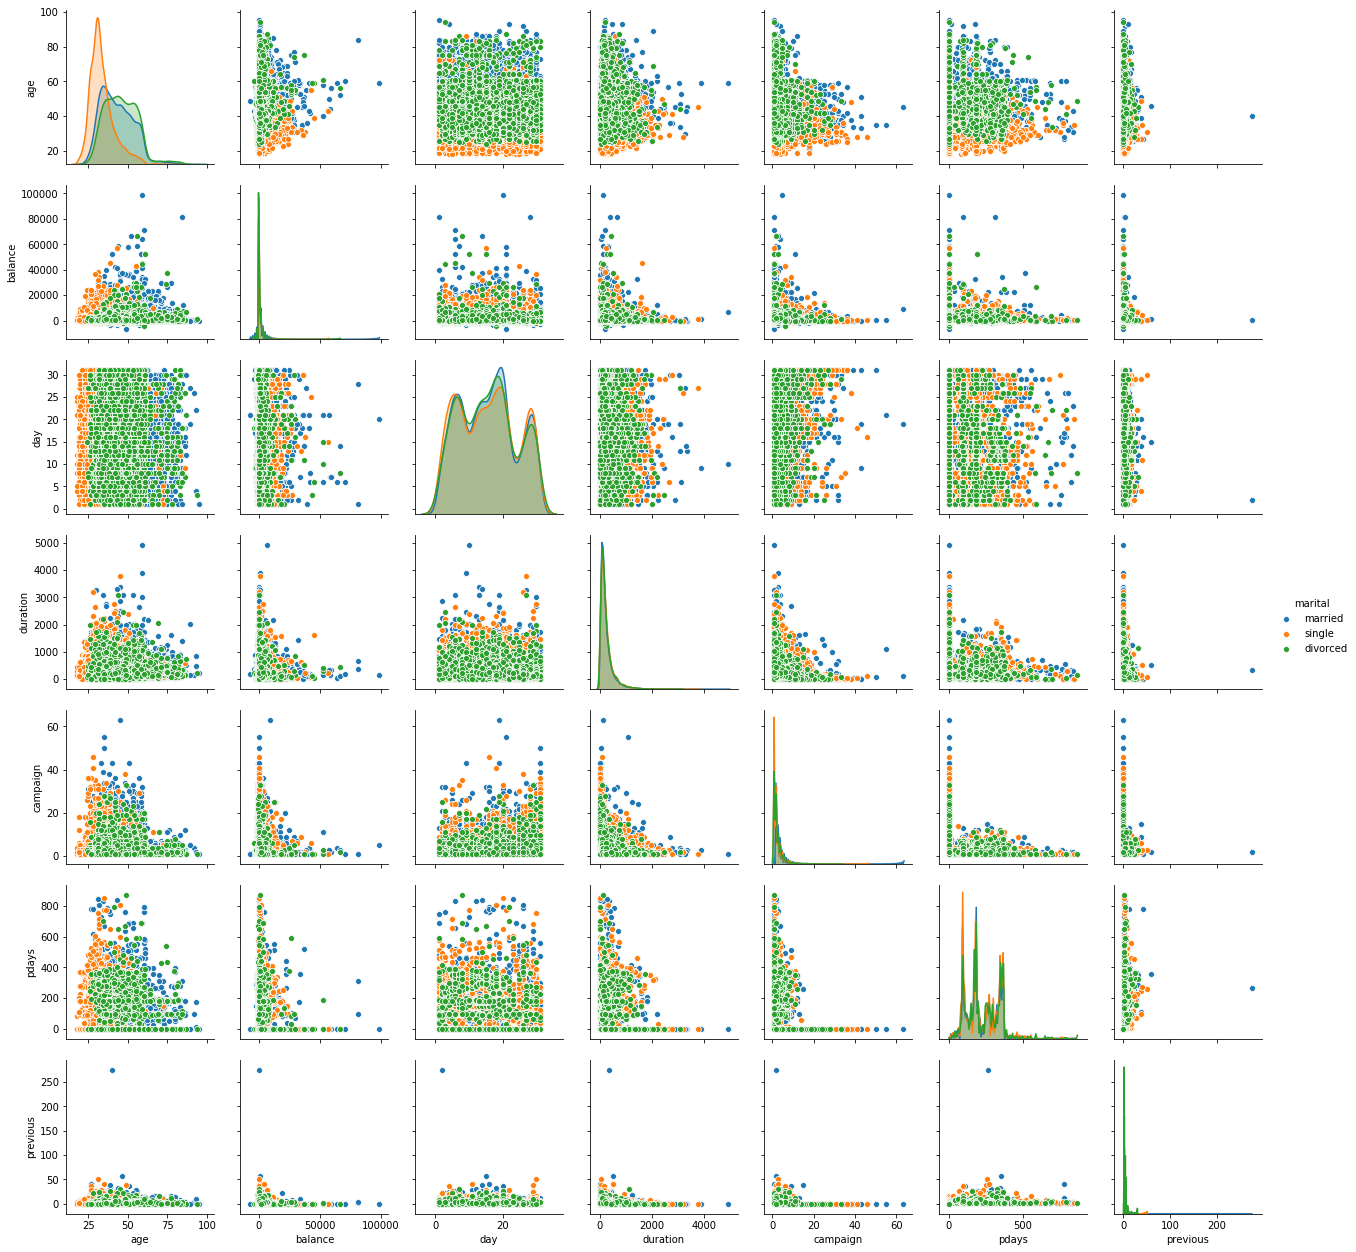

In [34]:
sns.pairplot(df, hue='marital');

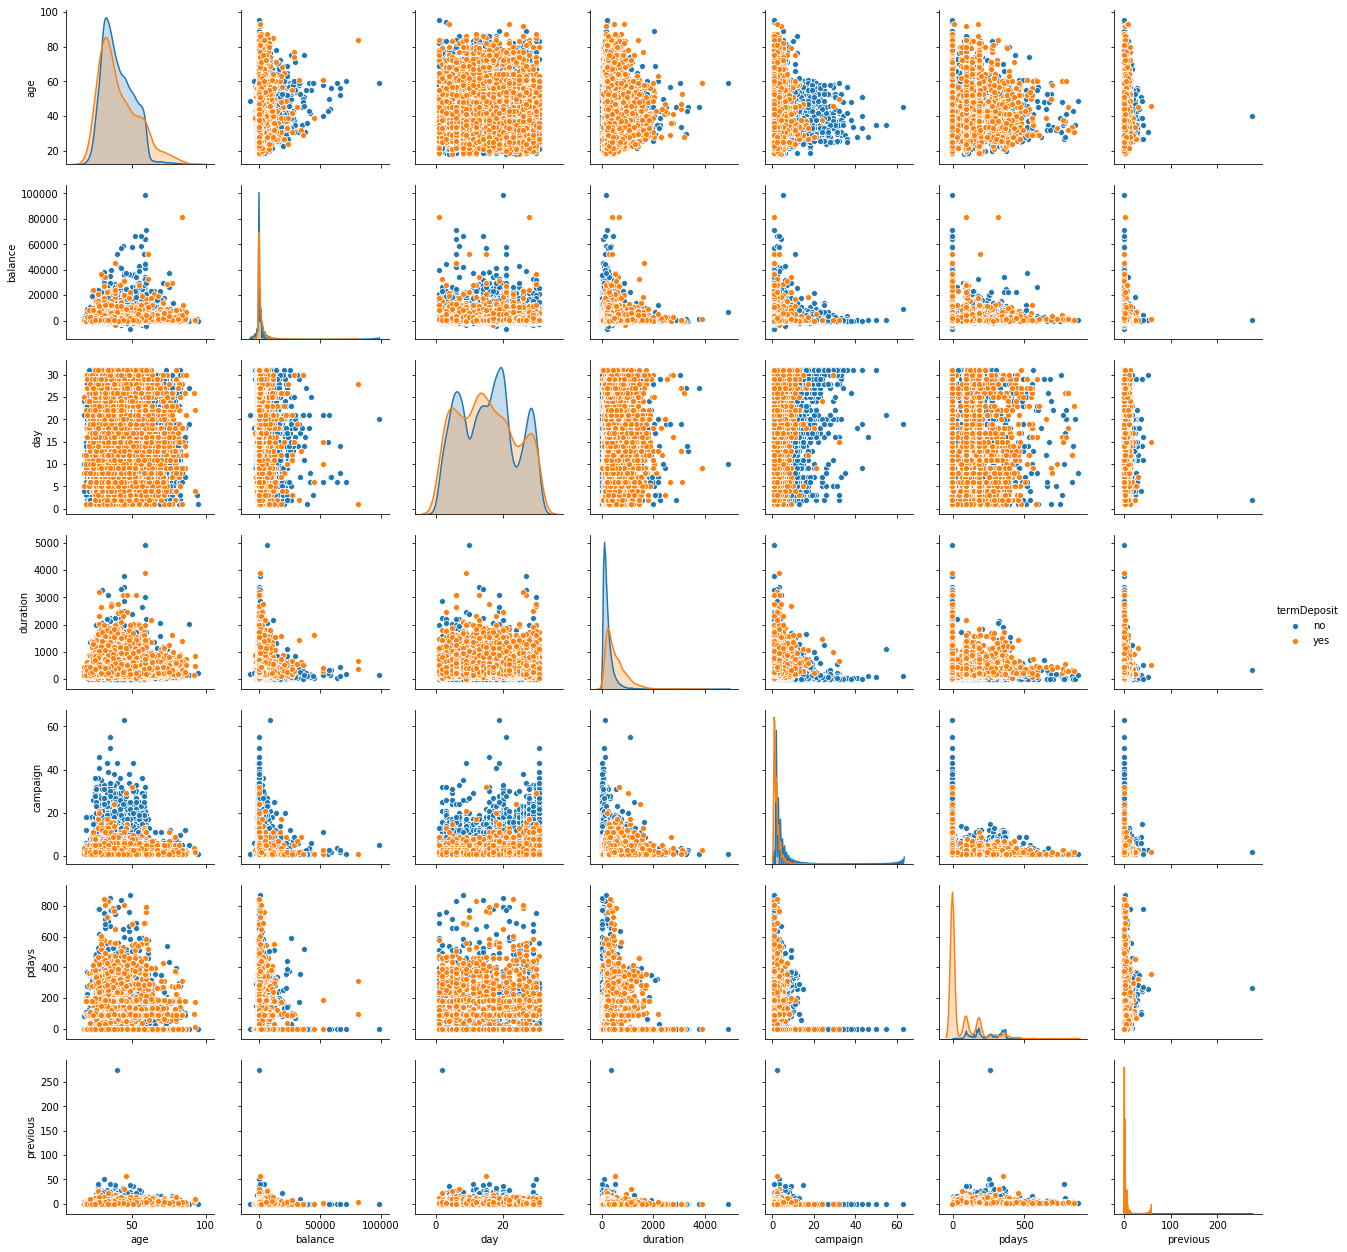

In [36]:
sns.pairplot(df, hue='termDeposit');

In [11]:
trace1 = go.Histogram(
    x=df[df.termDeposit == 'yes'][['balance']],
    opacity=0.75
)
trace2 = go.Histogram(
    x=df[['balance']],
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='histogram')

Get names of attributes with ```object``` type

In [37]:
[atr for atr, typ in dict(df.dtypes).items() if str(typ) == 'object']

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'termDeposit']

In [49]:
object_attributes = [atr for atr, typ in dict(df.dtypes).items() if str(typ) == 'object']
number_attributes = [atr for atr, typ in dict(df.dtypes).items() if str(typ) == 'float64']
object_attributes.remove('termDeposit')

[number_attributes, object_attributes]

[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome']]

In [58]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

fit = df[object_attributes].apply(lambda x: d[x.name].fit_transform(x))
df_numerical = pd.concat([fit, df[number_attributes]], axis=1) # the dataset ready to appy decision tree algorithm

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
0,4,1,2,0,1,0,2,8,3,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,9,2,1,0,1,0,2,8,3,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,2,1,1,0,1,1,2,8,3,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,1,1,3,0,1,0,2,8,3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,4,1,2,0,1,0,2,8,3,35.0,231.0,5.0,139.0,1.0,-1.0,0.0
5,4,2,2,0,1,1,2,8,3,28.0,447.0,5.0,217.0,1.0,-1.0,0.0
6,2,0,2,1,1,0,2,8,3,42.0,2.0,5.0,380.0,1.0,-1.0,0.0
7,5,1,0,0,1,0,2,8,3,58.0,121.0,5.0,50.0,1.0,-1.0,0.0
8,0,0,1,0,1,0,2,8,3,41.0,270.0,5.0,222.0,1.0,-1.0,0.0
9,0,2,1,0,1,0,2,8,3,29.0,390.0,5.0,137.0,1.0,-1.0,0.0


# Proper decision tree

In [59]:
object_attributes = [atr for atr, typ in dict(df.dtypes).items() if str(typ) == 'object']
number_attributes = [atr for atr, typ in dict(df.dtypes).items() if str(typ) == 'float64']

In [60]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

fit = df[object_attributes].apply(lambda x: d[x.name].fit_transform(x))
df_numerical = pd.concat([fit, df[number_attributes]], axis=1) # the dataset ready to appy decision tree algorithm

df_features = df_numerical.drop(columns='termDeposit')
df_outcome = df_numerical['termDeposit']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_outcome.values, test_size=0.33, random_state=42)

X_train.shape

(24233, 16)

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_impurity_decrease=0.001)
tree.fit(X_train, y_train)
y_test == tree.predict(X_test)

array([ True, False,  True, ...,  True, False,  True])

In [63]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, tree.predict(X_test)))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, tree.predict(X_test)))

DecisionTrees's Accuracy:  0.8912533512064343
[[10438   102]
 [ 1196   200]]


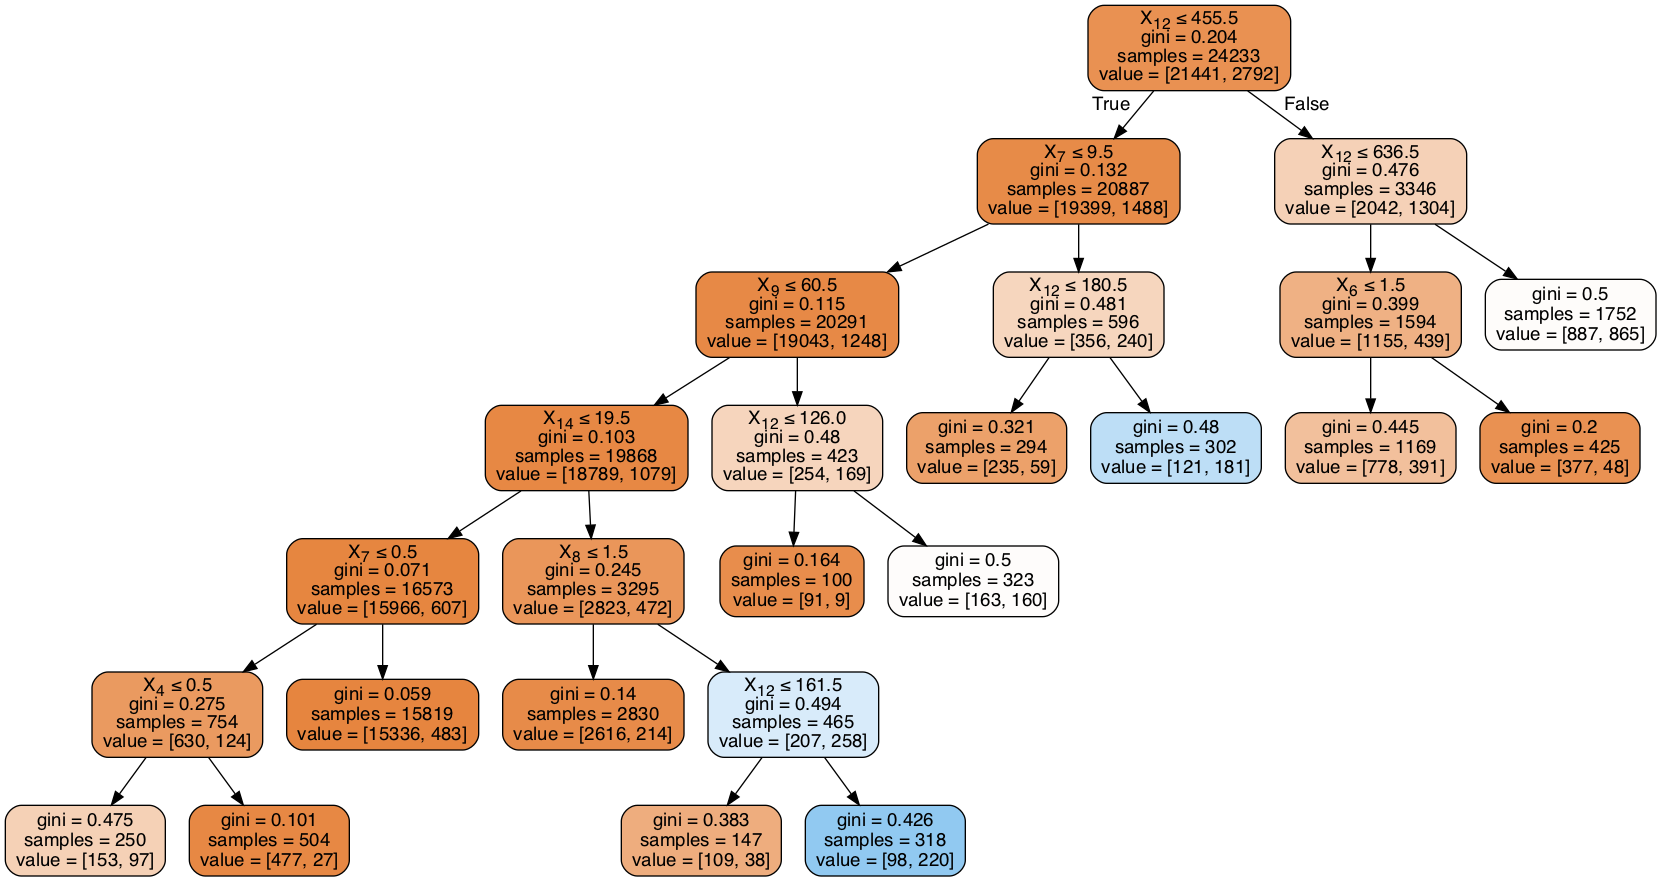

In [64]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())